# Welcome to the NoisePy Colab Tutorial!

This tutorial will walk you through the basic steps of using NoisePy to compute ambient noise cross correlation functions.


First, we install the noisepy-seis package

In [8]:
!pip install noisepy-seis
!pip uninstall noisepy-seis
!cd ..
!pip install -e ".[dev]"
!cd Jupyter_notebook

Found existing installation: noisepy-seis 0.5.13
Uninstalling noisepy-seis-0.5.13:
  Would remove:
    /Users/marinedenolle/miniconda3/envs/seiscloud/bin/noisepy
    /Users/marinedenolle/miniconda3/envs/seiscloud/lib/python3.8/site-packages/noisepy/seis/*
    /Users/marinedenolle/miniconda3/envs/seiscloud/lib/python3.8/site-packages/noisepy_seis-0.5.13.dist-info/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Obtaining file:///Users/marinedenolle/GIT_REPOS/NoisePy/Jupyter_notebook
ERROR: file:///Users/marinedenolle/GIT_REPOS/NoisePy/Jupyter_notebook does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
zsh:cd:1: no such file or directory: Jupyter_notebook


__Warning__: NoisePy uses ```obspy``` as a core Python module to manipulate seismic data. Restart the runtime now for proper installation of ```obspy``` on Colab.

Then we import the basic modules

In [1]:
from noisepy.seis import download, cross_correlate, stack, plotting_modules
from noisepy.seis.asdfstore import ASDFRawDataStore, ASDFCCStore
from noisepy.seis.datatypes import ConfigParameters
# logging.getLogger('matplotlib.font_manager').disabled = True
import os
import glob


# Configuration of the Job

The user should define the parameters to run the cross correlations in the block below. The class ConfigParam will store the parameters and be used in subsequent steps

In [2]:
dir0 = "./data"  # define the path were data and correlations will be
os.makedirs(dir0,exist_ok=True)  # create the directory
raw_data_path = os.path.join(dir0, "RAW_DATA")  # path for the raw data
cc_data_path = os.path.join(dir0, "CCF")        # path for individual cross correlations
stack_data_path = os.path.join(dir0, "STACK")   # path for the final stack


config = ConfigParameters()  # default config parameters which can be customized

# raw data parameters
config.inc_hours = 4      # number of hours to chunk/split the data
config.start_date = "2019_02_01_00_00_00"  # start time
config.end_date = "2019_02_10_00_00_00"  # end time
config.dt = 0.1   # sampling rate in seconds
config.samp_freq = 20.  # data to be sampled in 20 Hz.

# noise processing parameters
config.time_norm = "rma"  # choose between "one_bit", "rma", "no"
config.freq_norm = "rma"
config.cc_len = 1800.    # correlation window in seconds
config.step = 900.       # step in seconds to take and allow overlap
config.freqmin = 0.01    # lower frequency to bandpass the data before cross correlation.
config.freqmax = 10.     # higher frequency to bandpass the data before cross correlation.

## Step 0: download data

Use the function ```download``` with the following arguments: 

* ```path``` of where to put the data
* ``` channel list```: list of the seismic channels to download, and example is shown below
* ```station list```: list of the seismic stations (we need to change this to net.sta.loc.chan) 
* ```start time```: we need to change this to a datetime object
* ```end time```: we need to change this to a datetime object, or format it with a standard UTCDatetime
* ``inc_hour``: is the number of hours as increments, this interger is used to split the original data (usually in 1-day long time series for broadband seismometers) into shorter time chunk. It helps manage memory for large arrays.

In future updates, ```download``` will have the config object as an argument.

In [15]:
download(dir0, ["BHE","BHN","BHZ"], ["ARV", "BAK", "TFT"], [config.start_date], [config.end_date], config.inc_hours)

Download
        From: 2019-02-01T00:00:00.000000Z
        To: 2019-02-10T00:00:00.000000Z
        Stations: ['ARV', 'BAK', 'TFT']
        Channels: ['BHE', 'BHN', 'BHZ']
        
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_01_00_00_00T2019_02_01_04_00_00.h5' (6.5 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhe_00
downloading data   1.55 s; pre-process   0.15 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_01_00_00_00T2019_02_01_04_00_00.h5' (7.4 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhn_00
downloading data   0.76 s; pre-process   0.09 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_01_00_00_00T2019_02_01_04_00_00.h5' (8.3 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhz_00
downloading data   0.63 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_01_04_00_00T2019_02_01_08_00_00.h5' (6.4 MB)
	Contains 0 event(s)
	Contains wave

TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_03_00_00_00T2019_02_03_04_00_00.h5' (6.4 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhe_00
downloading data   0.58 s; pre-process   0.10 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_03_00_00_00T2019_02_03_04_00_00.h5' (7.3 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhn_00
downloading data   0.53 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_03_00_00_00T2019_02_03_04_00_00.h5' (8.2 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhz_00
downloading data   0.48 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_03_04_00_00T2019_02_03_08_00_00.h5' (6.4 MB)
	Contains 0 event(s)
	Contains waveform data from 4 station(s). bhe_00
downloading data   0.53 s; pre-process   0.09 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_03_04_00_00T2019_02_03_08_00_00.h5

ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_00_00_00T2019_02_05_04_00_00.h5' (1.8 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhn_00
downloading data   0.60 s; pre-process   0.09 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_00_00_00T2019_02_05_04_00_00.h5' (2.7 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhz_00
downloading data   0.55 s; pre-process   0.09 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_00_00_00T2019_02_05_04_00_00.h5' (3.6 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhe_00
downloading data   0.88 s; pre-process   0.09 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_00_00_00T2019_02_05_04_00_00.h5' (4.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhn_00
downloading data   0.78 s; pre-process   0.09 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_00_00_00T2019_02_05_04_00_00.h5

ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_16_00_00T2019_02_05_20_00_00.h5' (2.7 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhz_00
downloading data   0.58 s; pre-process   0.10 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_16_00_00T2019_02_05_20_00_00.h5' (3.6 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhe_00
downloading data   0.84 s; pre-process   0.10 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_16_00_00T2019_02_05_20_00_00.h5' (4.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhn_00
downloading data   0.85 s; pre-process   0.11 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_16_00_00T2019_02_05_20_00_00.h5' (5.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhz_00
downloading data   0.79 s; pre-process   0.10 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_05_16_00_00T2019_02_05_20_00_00.h5

BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_06_08_00_00T2019_02_06_12_00_00.h5' (3.6 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhe_00
downloading data   0.83 s; pre-process   0.09 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_06_08_00_00T2019_02_06_12_00_00.h5' (4.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhn_00
downloading data   0.84 s; pre-process   0.09 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_06_08_00_00T2019_02_06_12_00_00.h5' (5.4 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhz_00
downloading data   0.74 s; pre-process   0.14 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_06_08_00_00T2019_02_06_12_00_00.h5' (6.3 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhe_00
downloading data   0.74 s; pre-process   0.09 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_06_08_00_00T2019_02_06_12_00_00.h5

BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_00_00_00T2019_02_07_04_00_00.h5' (4.6 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhn_00
downloading data   0.79 s; pre-process   0.07 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_00_00_00T2019_02_07_04_00_00.h5' (5.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhz_00
downloading data   0.63 s; pre-process   0.07 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_00_00_00T2019_02_07_04_00_00.h5' (6.4 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhe_00
downloading data   0.58 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_00_00_00T2019_02_07_04_00_00.h5' (7.3 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhn_00
downloading data   0.58 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_00_00_00T2019_02_07_04_00_00.h5

BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_16_00_00T2019_02_07_20_00_00.h5' (5.5 MB)
	Contains 0 event(s)
	Contains waveform data from 2 station(s). bhz_00
downloading data   0.48 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_16_00_00T2019_02_07_20_00_00.h5' (6.5 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhe_00
downloading data   0.68 s; pre-process   0.09 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_16_00_00T2019_02_07_20_00_00.h5' (7.4 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhn_00
downloading data   0.68 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_16_00_00T2019_02_07_20_00_00.h5' (8.3 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhz_00
downloading data   0.53 s; pre-process   0.10 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_07_20_00_00T2019_02_08_00_00_00.h5

TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_08_08_00_00T2019_02_08_12_00_00.h5' (6.3 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhe_00
downloading data   0.55 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_08_08_00_00T2019_02_08_12_00_00.h5' (7.2 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhn_00
downloading data   0.50 s; pre-process   0.08 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_08_08_00_00T2019_02_08_12_00_00.h5' (8.1 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhz_00
downloading data   0.50 s; pre-process   0.08 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_08_12_00_00T2019_02_08_16_00_00.h5' (956.6 KB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhe_00
downloading data   0.60 s; pre-process   0.09 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_08_12_00_00T2019_02_08_16_00_00.

TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_00_00_00T2019_02_09_04_00_00.h5' (7.3 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhn_00
downloading data   0.55 s; pre-process   0.09 s
TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_00_00_00T2019_02_09_04_00_00.h5' (8.2 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhz_00
downloading data   0.50 s; pre-process   0.08 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_04_00_00T2019_02_09_08_00_00.h5' (957.1 KB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhe_00
downloading data   0.50 s; pre-process   0.09 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_04_00_00T2019_02_09_08_00_00.h5' (1.8 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhn_00
downloading data   0.40 s; pre-process   0.08 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_04_00_00T2019_02_09_08_00_00.

TFT
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_16_00_00T2019_02_09_20_00_00.h5' (8.2 MB)
	Contains 0 event(s)
	Contains waveform data from 3 station(s). bhz_00
downloading data   0.61 s; pre-process   0.12 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_20_00_00T2019_02_10_00_00_00.h5' (961.6 KB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhe_00
downloading data   1.59 s; pre-process   0.10 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_20_00_00T2019_02_10_00_00_00.h5' (1.8 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhn_00
downloading data   0.68 s; pre-process   0.09 s
ARV
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_20_00_00T2019_02_10_00_00_00.h5' (2.7 MB)
	Contains 0 event(s)
	Contains waveform data from 1 station(s). bhz_00
downloading data   0.63 s; pre-process   0.12 s
BAK
ASDF file [format version: 1.0.3]: 'data/RAW_DATA/2019_02_09_20_00_00T2019_02_10_00_00_00.

In [16]:
# list all of the files in the RAW_DATA directory
os.listdir(os.path.join(dir0,'RAW_DATA'))

['2019_02_07_08_00_00T2019_02_07_12_00_00.h5',
 '2019_02_02_16_00_00T2019_02_02_20_00_00.h5',
 '2019_02_01_12_00_00T2019_02_01_16_00_00.h5',
 '2019_02_03_00_00_00T2019_02_03_04_00_00.h5',
 '2019_02_02_12_00_00T2019_02_02_16_00_00.h5',
 '2019_02_01_16_00_00T2019_02_01_20_00_00.h5',
 '2019_02_04_08_00_00T2019_02_04_12_00_00.h5',
 '2019_02_07_16_00_00T2019_02_07_20_00_00.h5',
 '2019_02_02_08_00_00T2019_02_02_12_00_00.h5',
 '2019_02_04_12_00_00T2019_02_04_16_00_00.h5',
 '2019_02_05_20_00_00T2019_02_06_00_00_00.h5',
 '2019_02_06_00_00_00T2019_02_06_04_00_00.h5',
 '2019_02_05_00_00_00T2019_02_05_04_00_00.h5',
 '2019_02_07_12_00_00T2019_02_07_16_00_00.h5',
 '2019_02_09_04_00_00T2019_02_09_08_00_00.h5',
 '2019_02_01_08_00_00T2019_02_01_12_00_00.h5',
 '2019_02_04_16_00_00T2019_02_04_20_00_00.h5',
 '2019_02_05_12_00_00T2019_02_05_16_00_00.h5',
 '2019_02_06_16_00_00T2019_02_06_20_00_00.h5',
 '2019_02_03_08_00_00T2019_02_03_12_00_00.h5',
 '2019_02_07_00_00_00T2019_02_07_04_00_00.h5',
 '2019_02_08_

Plot the raw data, make sure it's noise!

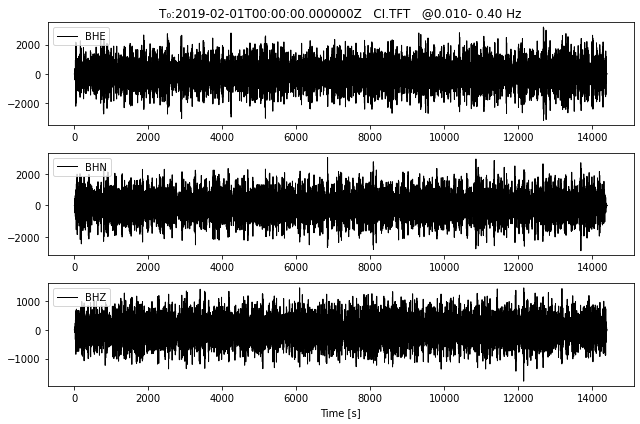

In [18]:
file = os.path.join(raw_data_path, "2019_02_01_00_00_00T2019_02_01_04_00_00.h5")
plotting_modules.plot_waveform(file,'CI','TFT',0.01,0.4)

## Step 1: Cross-correlation


In this step, we will perform the first cross-correlation function with several configuration. The default values are typical for regional seismic networks:

Data Processing choices:
* **Temporal normalization**: essential processing choice: Noisepy uses 3 types of normalization with the parameter ``time_norm``, there are entered as strings: 'no','rma', 'one_bit'. RMA will run a smoothing over the absolute amplitude to normalize the time series, with om[it argument ``smooth_N`` (in points).


* **Spectral normalization**: essentail processing choise. NoisePy uses 3 types of normalization there as well entered as strings: ''


In [3]:
from noisepy.seis import download, cross_correlate, stack, plotting_modules
from noisepy.seis.datatypes import ConfigParameters
raw_store = ASDFRawDataStore(raw_data_path) # Store for reading raw data
cc_store = ASDFCCStore(cc_data_path) # Store for writing CC data
cross_correlate(raw_store, config, cc_store)

2023-04-26 15:24:46,765 INFO asdfstore __init__ Initialized store with 54
2023-04-26 15:24:47,209 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:47,302 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,406 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,494 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,604 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,704 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,784 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,882 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:47,971 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:48,047 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:48,059 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:24:

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:48,282 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:24:48,283 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:24:48,284 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023-04-26 15:24:48,321 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0138s, write cc 0.0222s
2023-04-26 15:24:48,322 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:48,324 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:48,324 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:48,326 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:48,327 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:24:48,354 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0129s, write cc 0.0132s
2023-04-26 15:24:48,355 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.b

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 8207
it takes   1.76s to process the chunk of 2019-02-01T00:00:00+0000 - 2019-02-01T04:00:00+0000


2023-04-26 15:24:49,075 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:49,155 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:49,304 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:49,562 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:49,761 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:50,013 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:50,158 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:50,444 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:50,715 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:51,000 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:51,039 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:24:51,040 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee


2023-04-26 15:24:51,539 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0793s, write cc 0.1294s
2023-04-26 15:24:51,567 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:51,586 INFO asdfstore contains Cross-correlation CI.ARV_CI.BAK already exists
2023-04-26 15:24:51,589 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:51,594 INFO asdfstore contains Cross-correlation CI.ARV_CI.BAK already exists
2023-04-26 15:24:51,596 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00


bhe
bhe
ee


2023-04-26 15:24:51,673 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0281s, write cc 0.0434s
2023-04-26 15:24:51,674 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:51,677 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:24:51,678 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:51,680 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:24:51,682 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:24:51,682 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhn_00
2023-04-26 15:24:51,686 INFO asdfstore contains Cross-correlation CI.ARV_CI.ARV already exists
2023-04-26 15:24:51,687 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhz_00
2023-04-26 15:24:51,697 INFO asdfstore contains Cross-correlation CI.ARV_CI.ARV already exists
2023-04-26 15:24:51,698 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:51,850 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0006s, cc 0.0149s, write cc 0.0154s
2023-04-26 15:24:51,850 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:51,854 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:51,855 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:51,857 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:51,858 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:51,859 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:51,861 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:51,861 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:51,863 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:51,864 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:52,035 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:24:52,042 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:52,044 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:52,052 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:24:52,054 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:52,062 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:24:52,065 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0011s
2023-04-26 15:24:52,067 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:52,073 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists


unreadable garbarge 0
it takes   3.68s to process the chunk of 2019-02-01T04:00:00+0000 - 2019-02-01T08:00:00+0000


2023-04-26 15:24:52,580 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:52,675 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:52,779 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:52,862 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:52,950 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,042 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,138 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,215 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,287 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,364 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:53,370 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:24:53,371 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:53,623 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0167s, write cc 0.0148s
2023-04-26 15:24:53,624 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:53,626 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:53,626 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:53,628 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:53,630 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:24:53,630 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:53,633 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:53,634 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:53,635 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:53,645 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.55s to process the chunk of 2019-02-01T08:00:00+0000 - 2019-02-01T12:00:00+0000


2023-04-26 15:24:54,051 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:54,128 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,212 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,289 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,365 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,443 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,527 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,607 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,686 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,761 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:54,767 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:54,768 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:55,017 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0293s, write cc 0.0168s
2023-04-26 15:24:55,018 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:55,020 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:55,021 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:55,023 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:55,023 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:24:55,058 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0169s, write cc 0.0150s
2023-04-26 15:24:55,058 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:55,061 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:55,061 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:55,063 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:55,488 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:55,564 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:55,648 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:55,734 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:55,899 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,362 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,580 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,668 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,759 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,842 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:56,848 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:56,849 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.42s to process the chunk of 2019-02-01T12:00:00+0000 - 2019-02-01T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:57,086 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0141s, write cc 0.0137s
2023-04-26 15:24:57,086 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:57,088 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:57,089 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:57,091 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:57,093 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:57,093 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:57,095 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:57,096 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:57,098 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:57,098 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   2.03s to process the chunk of 2019-02-01T16:00:00+0000 - 2019-02-01T20:00:00+0000


2023-04-26 15:24:57,497 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:57,567 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:57,651 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:57,728 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:57,802 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:57,878 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:57,963 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:58,041 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:58,124 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:58,205 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:58,211 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:24:58,212 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:58,439 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:58,441 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:58,441 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:24:58,475 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0164s, write cc 0.0157s
2023-04-26 15:24:58,476 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:58,478 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:58,478 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:58,480 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:58,481 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:58,481 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:58,483 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.39s to process the chunk of 2019-02-01T20:00:00+0000 - 2019-02-02T00:00:00+0000


2023-04-26 15:24:58,889 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:24:58,968 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,057 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,159 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,256 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,333 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,412 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,498 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,575 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,658 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:24:59,664 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:24:59,665 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:24:59,891 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0148s, write cc 0.0243s
2023-04-26 15:24:59,892 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:24:59,893 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:59,894 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:24:59,896 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:24:59,896 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:24:59,936 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0195s, write cc 0.0176s
2023-04-26 15:24:59,936 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:24:59,938 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:24:59,939 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:24:59,941 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.45s to process the chunk of 2019-02-02T00:00:00+0000 - 2019-02-02T04:00:00+0000


2023-04-26 15:25:00,347 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:00,422 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,497 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,579 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,658 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,744 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,831 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:00,924 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:01,000 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:01,071 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:01,078 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:01,079 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:01,335 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0213s, write cc 0.0171s
2023-04-26 15:25:01,336 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:01,338 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:01,338 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:01,340 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:01,341 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:01,373 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0164s, write cc 0.0144s
2023-04-26 15:25:01,374 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:01,376 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:01,376 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:01,378 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.43s to process the chunk of 2019-02-02T04:00:00+0000 - 2019-02-02T08:00:00+0000


2023-04-26 15:25:01,779 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:01,841 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:01,917 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:01,996 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,075 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,152 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,226 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,303 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,374 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,450 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:02,458 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0008s
2023-04-26 15:25:02,460 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:02,713 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0181s, write cc 0.0156s
2023-04-26 15:25:02,713 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:02,715 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:02,716 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:02,718 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:02,719 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:02,720 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:02,723 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:02,724 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:02,726 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:02,726 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.34s to process the chunk of 2019-02-02T08:00:00+0000 - 2019-02-02T12:00:00+0000


2023-04-26 15:25:03,117 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:03,193 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,266 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,353 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,419 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,499 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,579 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,645 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,722 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,805 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:03,811 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:03,812 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:04,070 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0166s, write cc 0.0209s
2023-04-26 15:25:04,071 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:04,073 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:04,074 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:04,075 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:04,077 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:04,077 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:04,079 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:04,080 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:04,082 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:04,082 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:04,477 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:04,540 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,614 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,686 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,764 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,836 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,915 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:04,998 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:05,077 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:05,153 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:05,159 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:05,160 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.36s to process the chunk of 2019-02-02T12:00:00+0000 - 2019-02-02T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:05,389 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0166s, write cc 0.0142s
2023-04-26 15:25:05,390 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:05,392 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:05,393 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:05,396 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:05,397 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:05,436 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0205s, write cc 0.0170s
2023-04-26 15:25:05,437 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:05,439 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:05,440 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:05,442 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.36s to process the chunk of 2019-02-02T16:00:00+0000 - 2019-02-02T20:00:00+0000


2023-04-26 15:25:05,850 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:05,914 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:05,988 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,072 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,157 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,247 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,327 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,422 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,504 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,578 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:06,588 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:06,589 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:06,852 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0171s, write cc 0.0166s
2023-04-26 15:25:06,853 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:06,855 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:06,855 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:06,857 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:06,859 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:06,859 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:06,860 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:06,861 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:06,863 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:06,863 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.42s to process the chunk of 2019-02-02T20:00:00+0000 - 2019-02-03T00:00:00+0000


2023-04-26 15:25:07,262 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:07,334 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,401 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,479 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,556 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,633 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,711 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,793 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,874 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,946 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:07,954 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:07,955 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:08,195 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0201s, write cc 0.0154s
2023-04-26 15:25:08,196 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:08,198 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:08,198 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:08,200 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:08,201 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:08,234 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0157s, write cc 0.0162s
2023-04-26 15:25:08,235 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:08,238 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:08,238 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:08,241 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:08,666 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:08,745 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:08,840 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:08,929 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,024 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,152 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,359 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,452 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,538 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,617 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:09,623 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:09,624 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.39s to process the chunk of 2019-02-03T00:00:00+0000 - 2019-02-03T04:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:09,850 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:09,850 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:09,853 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:09,853 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:09,894 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0171s, write cc 0.0213s
2023-04-26 15:25:09,894 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:09,896 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:09,897 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:09,899 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:09,900 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:09,900 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:10,316 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:10,401 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,475 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,549 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,617 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,701 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,779 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,862 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:10,943 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:11,019 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:11,023 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:11,024 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.65s to process the chunk of 2019-02-03T04:00:00+0000 - 2019-02-03T08:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:11,259 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0203s, write cc 0.0219s
2023-04-26 15:25:11,260 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:11,264 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:11,265 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:11,267 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:11,267 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:11,319 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0215s, write cc 0.0275s
2023-04-26 15:25:11,320 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:11,323 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:11,323 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:11,325 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.41s to process the chunk of 2019-02-03T08:00:00+0000 - 2019-02-03T12:00:00+0000


2023-04-26 15:25:11,742 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:11,805 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:11,884 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:11,964 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,042 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,118 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,202 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,291 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,372 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,459 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:12,466 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:12,467 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:12,731 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0239s, write cc 0.0176s
2023-04-26 15:25:12,732 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:12,734 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:12,734 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:12,736 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:12,737 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:12,778 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0187s, write cc 0.0210s
2023-04-26 15:25:12,779 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:12,781 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:12,782 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:12,785 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:13,189 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:13,259 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,336 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,411 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,495 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,634 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,723 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,815 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,901 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:13,995 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:14,001 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:14,002 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.45s to process the chunk of 2019-02-03T12:00:00+0000 - 2019-02-03T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:14,253 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:14,254 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:14,258 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:14,258 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:14,295 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0173s, write cc 0.0179s
2023-04-26 15:25:14,296 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:14,299 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:14,299 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:14,304 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:14,305 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:14,306 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:14,749 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:14,829 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:14,915 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,001 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,088 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,187 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,302 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,385 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,475 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,568 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:15,578 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:15,579 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.55s to process the chunk of 2019-02-03T16:00:00+0000 - 2019-02-03T20:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:15,833 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0007s, cc 0.0187s, write cc 0.0156s
2023-04-26 15:25:15,834 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:15,836 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:15,836 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:15,838 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:15,839 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:15,875 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0007s, cc 0.0194s, write cc 0.0144s
2023-04-26 15:25:15,876 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:15,878 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:15,879 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:15,881 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:16,314 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:16,382 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,465 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,543 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,621 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,700 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,782 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,864 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:16,959 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:17,046 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:17,052 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:17,053 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.57s to process the chunk of 2019-02-03T20:00:00+0000 - 2019-02-04T00:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:17,291 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0164s, write cc 0.0194s
2023-04-26 15:25:17,292 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:17,294 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:17,294 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:17,296 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:17,297 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:17,330 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0157s, write cc 0.0151s
2023-04-26 15:25:17,331 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:17,333 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:17,334 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:17,336 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.43s to process the chunk of 2019-02-04T00:00:00+0000 - 2019-02-04T04:00:00+0000


2023-04-26 15:25:17,741 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:17,806 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:17,896 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:17,984 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,054 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,138 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,209 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,292 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,369 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,449 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:18,456 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:18,457 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:18,685 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:18,685 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:18,687 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:18,688 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:18,731 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0258s, write cc 0.0159s
2023-04-26 15:25:18,732 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:18,734 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:18,735 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:18,738 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:18,740 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:18,740 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.42s to process the chunk of 2019-02-04T04:00:00+0000 - 2019-02-04T08:00:00+0000


2023-04-26 15:25:19,187 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:19,268 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,359 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,453 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,539 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,615 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,694 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,799 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:19,899 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:20,001 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:20,007 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:20,008 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:20,236 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:20,237 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:20,242 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:20,246 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:20,253 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:20,258 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0007s
2023-04-26 15:25:20,261 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhz_00
2023-04-26 15:25:20,263 INFO asdfstore contains Cross-correlation CI.ARV_CI.ARV already exists
2023-04-26 15:25:20,265 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023-04-26 15:25:20,270 INFO asdfstore contains Cross-correlation CI.ARV_CI.BAK already exists
2023-04-26 15:25:20,274 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.73s to process the chunk of 2019-02-04T08:00:00+0000 - 2019-02-04T12:00:00+0000


2023-04-26 15:25:20,939 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:21,031 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,127 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,213 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,291 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,376 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,470 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,559 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,640 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,732 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:21,739 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:21,740 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:22,001 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0183s, write cc 0.0177s
2023-04-26 15:25:22,002 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:22,004 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:22,005 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:22,007 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:22,007 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:22,008 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:22,010 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:22,010 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:22,013 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:22,013 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.52s to process the chunk of 2019-02-04T12:00:00+0000 - 2019-02-04T16:00:00+0000


2023-04-26 15:25:22,411 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:22,476 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,564 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,639 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,720 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,800 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,876 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:22,966 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:23,041 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:23,115 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:23,122 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:23,123 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:23,397 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0164s, write cc 0.0181s
2023-04-26 15:25:23,397 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:23,399 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:23,400 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:23,402 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:23,403 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:23,440 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0177s, write cc 0.0156s
2023-04-26 15:25:23,441 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:23,443 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:23,444 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:23,446 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.45s to process the chunk of 2019-02-04T16:00:00+0000 - 2019-02-04T20:00:00+0000


2023-04-26 15:25:23,873 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:23,944 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,035 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,123 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,217 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,298 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,382 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,466 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,545 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,634 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:24,647 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:24,648 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:24,882 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0420s, write cc 0.0465s
2023-04-26 15:25:24,887 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:24,898 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:24,905 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:24,916 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:24,931 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:24,961 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhn_00
2023-04-26 15:25:24,974 INFO asdfstore contains Cross-correlation CI.ARV_CI.ARV already exists
2023-04-26 15:25:24,995 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhz_00
2023-04-26 15:25:25,006 INFO asdfstore contains Cross-correlation CI.ARV_CI.ARV already exists
2023-04-26 15:25:25,016 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:25,611 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:25,686 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:25,766 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:25,841 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:25,918 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:25,992 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:26,068 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:26,149 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:26,221 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:26,296 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:26,305 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:26,306 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.80s to process the chunk of 2019-02-04T20:00:00+0000 - 2019-02-05T00:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:26,544 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0246s, write cc 0.0254s
2023-04-26 15:25:26,545 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:26,548 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:26,549 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:26,552 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:26,552 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:26,590 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0153s, write cc 0.0197s
2023-04-26 15:25:26,590 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:26,592 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:26,593 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:26,595 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.32s to process the chunk of 2019-02-05T00:00:00+0000 - 2019-02-05T04:00:00+0000


2023-04-26 15:25:26,940 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:27,008 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,080 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,151 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,227 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,305 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,373 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,442 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,522 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,593 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:27,598 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:27,599 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:27,844 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0190s, write cc 0.0206s
2023-04-26 15:25:27,845 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:27,847 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:27,847 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:27,849 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:27,850 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:27,893 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0210s, write cc 0.0205s
2023-04-26 15:25:27,894 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:27,897 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:27,897 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:27,900 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:28,025 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:25:28,325 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.37s to process the chunk of 2019-02-05T04:00:00+0000 - 2019-02-05T08:00:00+0000


2023-04-26 15:25:28,535 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:28,792 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:29,003 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:29,234 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:29,547 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:29,840 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:29,983 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:30,092 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:30,235 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:30,240 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:30,241 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:25:30,325 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0193s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:30,492 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0197s, write cc 0.0176s
2023-04-26 15:25:30,493 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:30,495 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:30,496 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:30,498 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:30,498 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:30,544 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0196s, write cc 0.0238s
2023-04-26 15:25:30,544 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:30,547 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:30,547 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:30,549 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:30,906 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:30,975 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,057 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,138 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,235 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,335 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,423 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,507 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,581 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,683 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:31,689 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:31,690 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   2.58s to process the chunk of 2019-02-05T08:00:00+0000 - 2019-02-05T12:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:31,953 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0006s, cc 0.0208s, write cc 0.0165s
2023-04-26 15:25:31,954 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:31,956 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:31,956 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:31,958 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:31,959 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:31,960 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:31,962 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:31,963 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:31,965 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:31,966 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:32,319 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:32,404 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,474 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,562 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,648 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,718 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,809 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,891 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:32,974 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:33,070 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:33,075 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:33,076 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.41s to process the chunk of 2019-02-05T12:00:00+0000 - 2019-02-05T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:33,347 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0373s, write cc 0.0279s
2023-04-26 15:25:33,348 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:33,350 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:33,351 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:33,352 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:33,353 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:33,389 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0170s, write cc 0.0161s
2023-04-26 15:25:33,390 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:33,392 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:33,392 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:33,395 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:33,808 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:33,894 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,000 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,141 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,231 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,302 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,387 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,461 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,549 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,634 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:34,641 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:34,642 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.45s to process the chunk of 2019-02-05T16:00:00+0000 - 2019-02-05T20:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:34,894 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0196s, write cc 0.0195s
2023-04-26 15:25:34,894 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:34,896 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:34,897 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:34,899 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:34,900 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:34,901 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:34,903 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:34,903 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:34,905 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:34,906 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.47s to process the chunk of 2019-02-05T20:00:00+0000 - 2019-02-06T00:00:00+0000


2023-04-26 15:25:35,249 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:35,323 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,405 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,486 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,568 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,650 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,731 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,810 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,892 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,965 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:35,971 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:35,972 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:36,201 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0150s, write cc 0.0169s
2023-04-26 15:25:36,202 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:36,204 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:36,205 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:36,207 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:36,207 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:36,256 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0304s, write cc 0.0159s
2023-04-26 15:25:36,257 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:36,261 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:36,261 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:36,263 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.37s to process the chunk of 2019-02-06T00:00:00+0000 - 2019-02-06T04:00:00+0000


2023-04-26 15:25:36,621 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:36,696 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:36,774 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:36,855 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:36,926 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,005 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,083 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,157 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,253 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,325 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:37,330 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:37,331 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:37,596 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0203s, write cc 0.0193s
2023-04-26 15:25:37,599 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:37,601 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:37,602 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:37,604 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:37,605 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:37,605 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:37,607 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:37,608 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:37,609 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:37,610 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.33s to process the chunk of 2019-02-06T04:00:00+0000 - 2019-02-06T08:00:00+0000


2023-04-26 15:25:37,949 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:38,028 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,098 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,170 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,252 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,330 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,416 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,492 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,570 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,643 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:38,651 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:38,652 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:38,889 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0137s, write cc 0.0141s
2023-04-26 15:25:38,890 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:38,892 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:38,892 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:38,894 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:38,894 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:38,933 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0203s, write cc 0.0159s
2023-04-26 15:25:38,934 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:38,936 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:38,936 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:38,938 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:39,349 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.39s to process the chunk of 2019-02-06T08:00:00+0000 - 2019-02-06T12:00:00+0000


2023-04-26 15:25:39,414 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,487 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,573 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,642 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,716 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,791 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,869 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:39,942 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:40,014 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:40,019 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:40,020 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:25:40,148 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0439s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:40,290 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:40,290 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:40,293 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:40,294 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:40,295 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023-04-26 15:25:40,338 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0253s, write cc 0.0153s
2023-04-26 15:25:40,339 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:40,343 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:40,344 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:40,345 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:40,346 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:40,743 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.39s to process the chunk of 2019-02-06T12:00:00+0000 - 2019-02-06T16:00:00+0000


2023-04-26 15:25:40,891 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:40,974 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,051 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,131 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,213 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,301 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,385 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,475 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,564 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:41,570 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:41,571 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:25:41,626 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0250s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:41,806 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0177s, write cc 0.0206s
2023-04-26 15:25:41,809 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:41,812 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:41,813 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:41,815 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:41,815 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:41,859 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0213s, write cc 0.0192s
2023-04-26 15:25:41,860 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:41,862 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:41,862 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:41,864 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.47s to process the chunk of 2019-02-06T16:00:00+0000 - 2019-02-06T20:00:00+0000


2023-04-26 15:25:42,215 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:42,283 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,364 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,442 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,527 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,614 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,686 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,759 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,830 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,911 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:42,916 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:42,917 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:43,167 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0217s, write cc 0.0145s
2023-04-26 15:25:43,168 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:43,170 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:43,170 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:43,172 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:43,173 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:43,215 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0190s, write cc 0.0204s
2023-04-26 15:25:43,215 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:43,217 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:43,218 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:43,220 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:43,568 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:43,639 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:43,716 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:43,796 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:43,887 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:43,970 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:44,052 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:44,126 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:44,203 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:44,284 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:44,293 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:44,294 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.36s to process the chunk of 2019-02-06T20:00:00+0000 - 2019-02-07T00:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:44,544 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0277s, write cc 0.0237s
2023-04-26 15:25:44,545 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:44,547 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:44,548 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:44,549 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:44,550 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:44,582 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0138s, write cc 0.0145s
2023-04-26 15:25:44,583 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:44,585 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:44,585 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:44,587 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:44,961 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:45,033 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,112 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,194 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,348 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,450 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,535 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,610 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,690 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,776 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:45,781 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:45,782 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.39s to process the chunk of 2019-02-07T00:00:00+0000 - 2019-02-07T04:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:46,024 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0188s, write cc 0.0156s
2023-04-26 15:25:46,024 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:46,027 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:46,027 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:46,029 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:46,029 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:46,066 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0193s, write cc 0.0150s
2023-04-26 15:25:46,066 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:46,068 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:46,069 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:46,071 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:46,529 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:46,608 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:46,695 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:46,785 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:46,985 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,072 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,199 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,304 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,382 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,466 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:47,472 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:47,473 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.49s to process the chunk of 2019-02-07T04:00:00+0000 - 2019-02-07T08:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:47,697 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:47,698 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:47,702 INFO asdfstore contains Cross-correlation CI.ARV_CI.TFT already exists
2023-04-26 15:25:47,703 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:47,704 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023-04-26 15:25:47,745 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0189s, write cc 0.0195s
2023-04-26 15:25:47,746 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:47,748 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:47,749 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:47,751 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:47,751 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:48,166 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:48,235 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,338 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,465 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,545 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,621 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,704 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,835 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,917 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:48,989 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:49,004 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:25:49,005 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.69s to process the chunk of 2019-02-07T08:00:00+0000 - 2019-02-07T12:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:49,299 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0225s, write cc 0.0159s
2023-04-26 15:25:49,300 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:49,304 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:49,305 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:49,307 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:49,308 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:49,328 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0080s, write cc 0.0098s
2023-04-26 15:25:49,328 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:49,331 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:49,331 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:49,333 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:49,677 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:49,740 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:49,856 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:49,932 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,006 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,177 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,250 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,326 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,409 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,499 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:50,505 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:50,505 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.52s to process the chunk of 2019-02-07T12:00:00+0000 - 2019-02-07T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:50,750 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0152s, write cc 0.0147s
2023-04-26 15:25:50,751 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:50,753 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:50,754 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:50,756 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:50,757 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:50,758 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:50,759 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:50,760 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:50,762 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:50,763 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.42s to process the chunk of 2019-02-07T16:00:00+0000 - 2019-02-07T20:00:00+0000


2023-04-26 15:25:51,108 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:51,189 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,259 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,333 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,410 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,492 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,574 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,657 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,736 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,819 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:51,827 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:25:51,829 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:52,065 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:52,066 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:52,067 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:52,068 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:52,103 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0169s, write cc 0.0167s
2023-04-26 15:25:52,104 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:52,106 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:52,106 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:52,108 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:52,110 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:52,110 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:52,473 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.36s to process the chunk of 2019-02-07T20:00:00+0000 - 2019-02-08T00:00:00+0000


2023-04-26 15:25:52,549 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:52,626 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:52,692 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:52,772 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:52,850 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:52,932 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:53,004 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:53,082 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:53,147 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:53,155 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:53,156 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:25:53,202 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0236s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:53,381 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:53,382 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:53,384 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:53,384 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:53,419 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0176s, write cc 0.0149s
2023-04-26 15:25:53,420 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:53,422 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:53,423 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:53,424 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:53,426 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:53,426 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.30s to process the chunk of 2019-02-08T00:00:00+0000 - 2019-02-08T04:00:00+0000


2023-04-26 15:25:53,779 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:53,859 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:53,928 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,007 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,092 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,170 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,246 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,338 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,415 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,500 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:54,505 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:54,506 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:54,740 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0157s, write cc 0.0190s
2023-04-26 15:25:54,741 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:54,743 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:54,743 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:54,747 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:54,748 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:54,781 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0165s, write cc 0.0151s
2023-04-26 15:25:54,782 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:54,784 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:54,785 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:54,787 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.35s to process the chunk of 2019-02-08T04:00:00+0000 - 2019-02-08T08:00:00+0000


2023-04-26 15:25:55,142 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:55,213 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,299 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,376 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,470 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,543 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,620 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,689 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,788 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,873 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:55,881 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:55,882 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:56,100 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0254s, write cc 0.0169s
2023-04-26 15:25:56,105 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:56,107 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:56,108 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:56,110 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:56,110 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:56,161 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0322s, write cc 0.0160s
2023-04-26 15:25:56,162 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:56,164 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:56,164 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:56,166 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.38s to process the chunk of 2019-02-08T08:00:00+0000 - 2019-02-08T12:00:00+0000


2023-04-26 15:25:56,512 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:56,573 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:56,641 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:56,713 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:56,890 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:56,967 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:57,266 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:57,497 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:57,587 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:57,677 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:57,684 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:57,685 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:57,916 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0182s, write cc 0.0293s
2023-04-26 15:25:57,917 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:25:57,919 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:57,920 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:57,922 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:57,923 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:57,959 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0187s, write cc 0.0146s
2023-04-26 15:25:57,960 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:57,962 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:57,963 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:57,965 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.79s to process the chunk of 2019-02-08T12:00:00+0000 - 2019-02-08T16:00:00+0000


2023-04-26 15:25:58,338 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:25:58,405 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,487 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,561 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,648 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,735 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,826 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,909 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:58,990 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:59,091 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:59,096 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:59,097 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:59,323 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:59,323 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:25:59,326 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:25:59,326 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:25:59,364 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0179s, write cc 0.0172s
2023-04-26 15:25:59,364 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:25:59,367 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:59,367 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:25:59,369 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:25:59,371 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:25:59,371 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:25:59,744 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.43s to process the chunk of 2019-02-08T16:00:00+0000 - 2019-02-08T20:00:00+0000


2023-04-26 15:25:59,813 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:59,890 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:25:59,968 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,058 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,146 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,239 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,329 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,407 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,491 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:00,497 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:00,498 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:26:00,554 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0305s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:00,746 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0208s, write cc 0.0160s
2023-04-26 15:26:00,747 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:00,751 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:00,751 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:00,753 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:00,754 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:26:00,793 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0195s, write cc 0.0173s
2023-04-26 15:26:00,794 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:00,796 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:00,796 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:00,798 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:01,179 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:26:01,244 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,326 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,416 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,506 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,582 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,666 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,760 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,836 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,921 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:01,926 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:01,927 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.44s to process the chunk of 2019-02-08T20:00:00+0000 - 2019-02-09T00:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:02,184 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0166s, write cc 0.0170s
2023-04-26 15:26:02,185 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:02,187 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:02,188 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:02,190 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:02,191 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:02,191 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:02,193 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:02,193 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:02,195 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:02,196 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.35s to process the chunk of 2019-02-09T00:00:00+0000 - 2019-02-09T04:00:00+0000


2023-04-26 15:26:02,544 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:26:02,610 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:02,694 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:02,781 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:02,871 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:02,961 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:03,088 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:03,190 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:03,272 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:03,353 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:03,360 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:03,361 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:03,640 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0260s, write cc 0.0484s
2023-04-26 15:26:03,641 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:03,644 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:03,645 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:03,648 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:03,648 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:26:03,701 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0004s, cc 0.0269s, write cc 0.0232s
2023-04-26 15:26:03,701 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:03,704 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:03,704 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:03,707 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:03,878 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:03,884 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:26:03,885 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:03,887 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:26:03,889 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:03,889 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:03,891 INFO asdfstore contains Cross-correlation CI.TFT_CI.TFT already exists
2023-04-26 15:26:04,175 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000


unreadable garbarge 0
it takes   1.62s to process the chunk of 2019-02-09T04:00:00+0000 - 2019-02-09T08:00:00+0000


2023-04-26 15:26:04,238 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,323 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,395 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,473 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,572 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,647 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,730 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,815 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,916 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:04,923 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:26:04,924 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04-26 15:26:04,980 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0280s, write cc

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:05,155 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0003s
2023-04-26 15:26:05,156 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhe_00
2023-04-26 15:26:05,194 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0201s, write cc 0.0154s
2023-04-26 15:26:05,195 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:05,197 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:05,198 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:05,200 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:05,200 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:26:05,237 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0003s, cc 0.0176s, write cc 0.0171s
2023-04-26 15:26:05,238 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:05,240 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already e

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:05,609 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:26:05,675 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:05,755 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:05,832 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:05,924 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,014 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,103 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,177 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,266 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,349 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:06,356 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0007s
2023-04-26 15:26:06,357 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.43s to process the chunk of 2019-02-09T08:00:00+0000 - 2019-02-09T12:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:06,599 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0200s, write cc 0.0174s
2023-04-26 15:26:06,600 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:06,606 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:06,606 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:06,608 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:06,609 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:26:06,656 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0212s, write cc 0.0221s
2023-04-26 15:26:06,656 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:06,659 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:06,659 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:06,661 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:07,062 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:26:07,191 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,320 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,427 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,520 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,604 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,694 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,779 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,858 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,939 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:07,945 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:07,946 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

unreadable garbarge 0
it takes   1.44s to process the chunk of 2019-02-09T12:00:00+0000 - 2019-02-09T16:00:00+0000
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:08,189 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0233s, write cc 0.0148s
2023-04-26 15:26:08,190 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:08,192 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:08,193 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:08,195 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:08,196 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023-04-26 15:26:08,227 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0160s, write cc 0.0127s
2023-04-26 15:26:08,228 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:08,230 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:08,231 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:08,233 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT alrea

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.54s to process the chunk of 2019-02-09T16:00:00+0000 - 2019-02-09T20:00:00+0000


2023-04-26 15:26:08,587 DEBUG S1_fft_cc_MPI cross_correlate nseg_chunk: 14, nnfft: 36000
2023-04-26 15:26:08,676 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:08,763 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:08,839 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:08,912 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,008 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,086 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,165 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,246 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,317 DEBUG S1_fft_cc_MPI compute_fft N and Nfft are 14, 36000
2023-04-26 15:26:09,323 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0004s
2023-04-26 15:26:09,324 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.ARV.bhe_00
2023-04

bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee
bhe
bhe
ee


2023-04-26 15:26:09,580 DEBUG S1_fft_cc_MPI cross_correlate read S 0.0005s, cc 0.0191s, write cc 0.0152s
2023-04-26 15:26:09,581 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhn_00
2023-04-26 15:26:09,584 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:09,584 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhz_00
2023-04-26 15:26:09,586 INFO asdfstore contains Cross-correlation CI.BAK_CI.TFT already exists
2023-04-26 15:26:09,588 DEBUG S1_fft_cc_MPI cross_correlate smoothing source takes 0.0005s
2023-04-26 15:26:09,588 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhn_00
2023-04-26 15:26:09,590 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:09,591 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.BAK.bhz_00
2023-04-26 15:26:09,592 INFO asdfstore contains Cross-correlation CI.BAK_CI.BAK already exists
2023-04-26 15:26:09,593 DEBUG S1_fft_cc_MPI cross_correlate receiver: CI.TFT.bhe_00
2023

bhe
bhe
ee
bhe
bhe
ee
unreadable garbarge 0
it takes   1.35s to process the chunk of 2019-02-09T20:00:00+0000 - 2019-02-10T00:00:00+0000
it takes  83.00s to process step 1 in total


Plot a single set of the cross correlation

In [ ]:
print(os.listdir(cc_data_path))

2023-04-26 15:19:34,337 DEBUG pyplot switch_backend Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2023-04-26 15:19:34,344 DEBUG pyplot switch_backend Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2023-04-26 15:19:34,352 DEBUG font_manager _findfont_cached findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-04-26 15:19:34,354 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
2023-04-26 15:19:34,355 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', varia

2023-04-26 15:19:34,365 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,366 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2023-04-26 15:19:34,366 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) =

2023-04-26 15:19:34,390 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,391 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,391 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,392 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='nor

2023-04-26 15:19:34,404 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,404 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,405 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-04-26 15:19:34,405 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
20

2023-04-26 15:19:34,419 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,419 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf', name='Noto Sans Manichaean', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,420 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,420 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', w

2023-04-26 15:19:34,433 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-04-26 15:19:34,433 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,434 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,434 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stre

2023-04-26 15:19:34,447 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,448 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43
2023-04-26 15:19:34,448 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,449 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size=

2023-04-26 15:19:34,460 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2023-04-26 15:19:34,461 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-04-26 15:19:34,461 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,462 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal',

2023-04-26 15:19:34,473 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,474 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,474 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,475 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal'

./data/CCF/2019_02_08_04_00_00T2019_02_08_08_00_00.h5


2023-04-26 15:19:34,478 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf', name='Noto Sans Modi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,478 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-04-26 15:19:34,479 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawadi-Regular.ttf', name='Noto Sans Khudawadi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,479 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weigh

2023-04-26 15:19:34,492 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-04-26 15:19:34,493 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,493 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,493 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='nor

2023-04-26 15:19:34,506 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan-Regular.ttf', name='Noto Sans Duployan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,507 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Regular.ttf', name='Noto Sans Newa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,507 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
2023-04-26 15:19:34,508 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal

2023-04-26 15:19:34,522 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,522 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,523 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,523 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight

2023-04-26 15:19:34,535 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,535 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,535 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,536 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah-Regular.ttf', name='Noto Sans Bassa Vah', style='normal',

2023-04-26 15:19:34,678 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,678 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2023-04-26 15:19:34,679 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26

2023-04-26 15:19:34,706 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,708 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,710 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,712 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.ttf', name='Noto Sans Siddham', style='nor

2023-04-26 15:19:34,758 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,759 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,759 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-04-26 15:19:34,759 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='no

2023-04-26 15:19:34,797 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuki-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,797 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,797 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,798 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
20

2023-04-26 15:19:34,809 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,810 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,810 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
2023-04-26 15:19:34,810 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26

2023-04-26 15:19:34,823 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,823 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,824 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,824 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weigh

2023-04-26 15:19:34,836 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,836 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,837 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,837 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmu

2023-04-26 15:19:34,848 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,849 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,849 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365
2023-04-26 15:19:34,849 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, 

2023-04-26 15:19:34,861 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCiti-Regular.ttf', name='Noto Sans Warang Citi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,861 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-04-26 15:19:34,861 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=295, stretch='normal', size='scalable')) = 10.14975
2023-04-26 15:19:34,862 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch

2023-04-26 15:19:34,873 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,873 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,874 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,874 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='n

2023-04-26 15:19:34,886 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,887 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,887 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,887 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, 

2023-04-26 15:19:34,899 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,900 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-26 15:19:34,900 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-04-26 15:19:34,901 DEBUG font_manager _findfont_cached findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal', variant='no

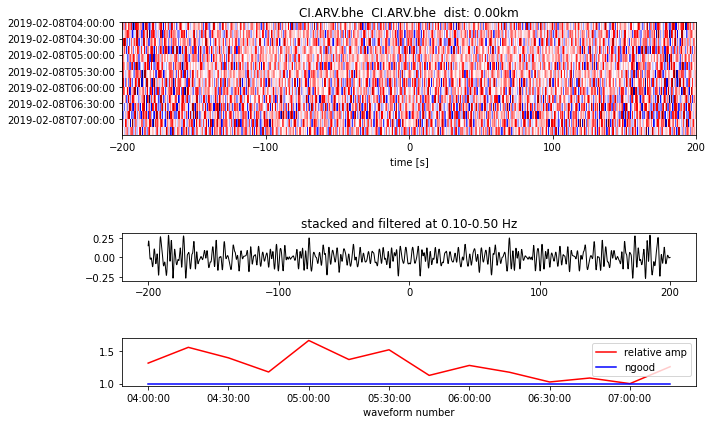

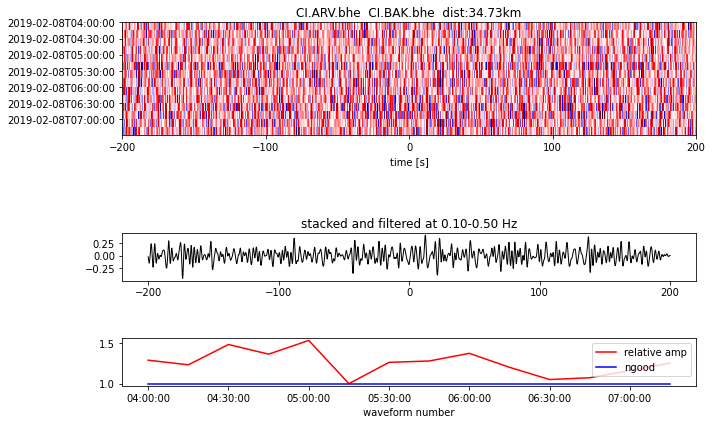

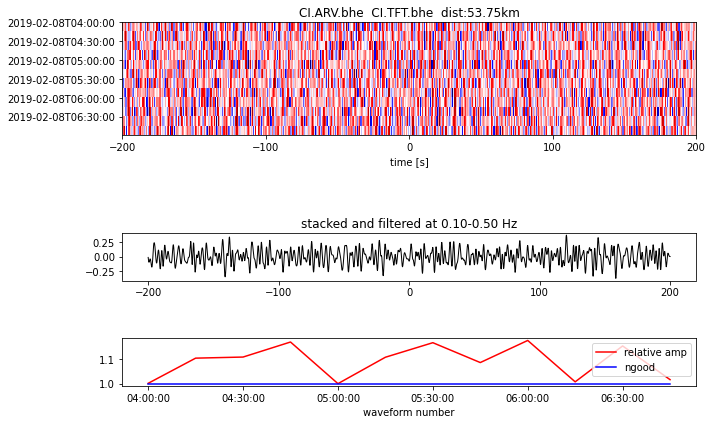

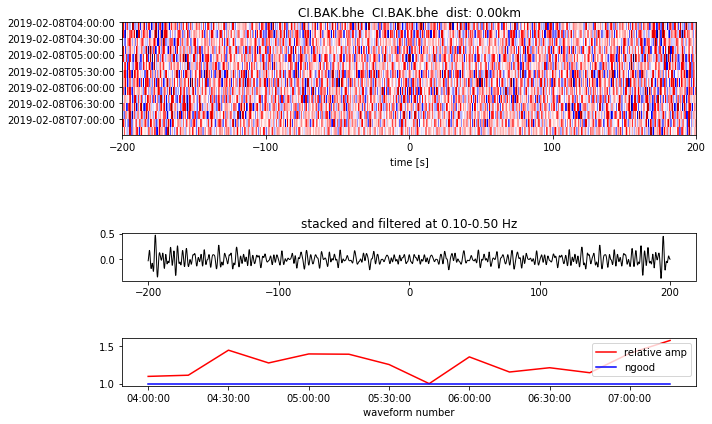

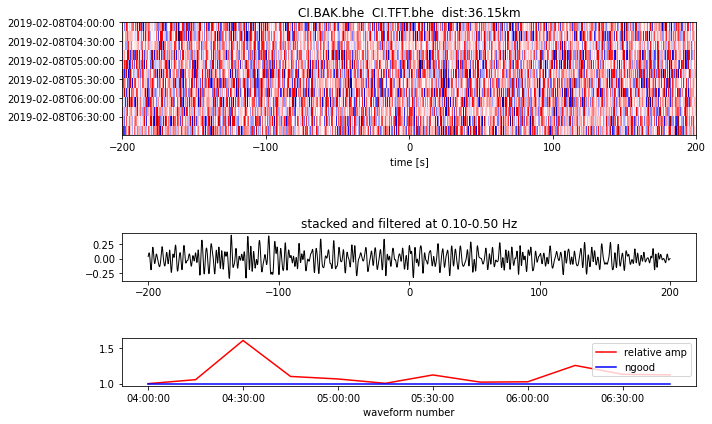

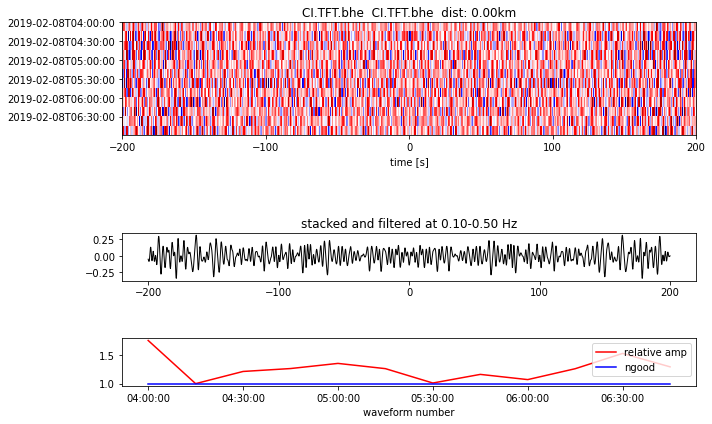

In [4]:
file = os.path.join(cc_data_path, '2019_02_08_04_00_00T2019_02_08_08_00_00.h5')
print(file)
plotting_modules.plot_substack_cc(file,0.1,0.5,200,False)

In [28]:
print(plotting_modules.plot_substack_cc)

<function plot_substack_cc at 0x7fc0b90f3820>


## Step 3: Stack the cross correlation

Provide a pathto where the data is.

In [3]:
stack(dir0, "linear")

2023-04-26 15:13:00,079 DEBUG attrs __getitem__ Creating converter from 3 to 5


0th path for station-pair CI.ARV_CI.ARV
Good on memory (need  0.20 G and 4.0 G provided)!
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_00_00_00T2019_02_01_04_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_04_00_00T2019_02_01_08_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_08_00_00T2019_02_01_12_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_12_00_00T2019_02_01_16_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_16_00_00T2019_02_01_20_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto-correlation CI.ARV_CI.ARV in ./data/CCF/2019_02_01_20_00_00T2019_02_02_00_00_00.h5
['bhe_bhe']
continue! not enough cross components for auto

['bhe_bhe']
continue! not enough cross components for cross-correlation CI.ARV_CI.BAK in ./data/CCF/2019_02_09_16_00_00T2019_02_09_20_00_00.h5
['bhe_bhe']
continue! not enough cross components for cross-correlation CI.ARV_CI.BAK in ./data/CCF/2019_02_09_20_00_00T2019_02_10_00_00_00.h5
loading CCF data takes   0.10s
2th path for station-pair CI.ARV_CI.TFT
Good on memory (need  0.20 G and 4.0 G provided)!
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_00_00_00T2019_02_01_04_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_04_00_00T2019_02_01_08_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_08_00_00T2019_02_01_12_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_12_00_00T2019_02_01_16_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_16_00_00T2019_02_01_20_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./data/CCF/2019_02_01_20_00_00T2019_02_02_00_00_00.h5
continue! no pair of CI.ARV_CI.TFT in ./d

['bhe_bhe']
continue! not enough cross components for cross-correlation CI.BAK_CI.TFT in ./data/CCF/2019_02_09_20_00_00T2019_02_10_00_00_00.h5
loading CCF data takes   0.11s
it takes   5.06s to process step 2 in total


Plot the stacks

In [ ]:
!ls ./data/*

In [ ]:
files = glob.glob(os.path.join(stack_data_path, '**/*.h5'))
print(files)
plotting_modules.plot_all_moveout(files, 'Allstack_linear', 0.1, 0.2, 'ZZ', 1)